In [1]:
library(rstan)
library(bayesplot)

rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

Loading required package: StanHeaders
Loading required package: ggplot2
rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
This is bayesplot version 1.7.0
- Online documentation and vignettes at mc-stan.org/bayesplot
- bayesplot theme set to bayesplot::theme_default()
   * Does _not_ affect other ggplot2 plots
   * See ?bayesplot_theme_set for details on theme setting


In [2]:
file_beer_sales_2 <- read.csv("https://raw.githubusercontent.com/logics-of-blue/book-r-stan-bayesian-model-intro/master/book-data/3-2-1-beer-sales-2.csv")
sample_size <- nrow(file_beer_sales_2)

In [3]:
dim(file_beer_sales_2)

[1] 100   2

In [5]:
temperature_pred <- 11:30
temperature_pred

[1] 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30

In [8]:
data_list_pred <- list(
    N = sample_size,
    sales = file_beer_sales_2$sales,
    temperature = file_beer_sales_2$temperature,
    N_pred = length(temperature_pred),
    temperature_pred = temperature_pred
)

mcmc_result_pred <- stan(
    file = "3-3-1-simple-lm-pred.stan",
    data = data_list_pred,
    seed = 1
)

In [10]:
print(mcmc_result_pred, probs = c(0.025, 0.5, 0.975))

Inference for Stan model: 3-3-1-simple-lm-pred.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                  mean se_mean    sd    2.5%     50%   97.5% n_eff Rhat
Intercept        21.01    0.15  6.02    8.87   21.11   32.70  1652    1
beta              2.47    0.01  0.29    1.90    2.47    3.05  1622    1
sigma            17.07    0.03  1.21   14.92   17.00   19.62  1816    1
mu_pred[1]       48.15    0.07  3.09   41.85   48.14   54.08  1891    1
mu_pred[2]       50.62    0.06  2.85   44.83   50.59   56.14  1965    1
mu_pred[3]       53.09    0.06  2.63   47.81   53.06   58.12  2066    1
mu_pred[4]       55.55    0.05  2.42   50.70   55.55   60.15  2207    1
mu_pred[5]       58.02    0.05  2.22   53.55   58.03   62.23  2407    1
mu_pred[6]       60.49    0.04  2.06   56.40   60.50   64.47  2678    1
mu_pred[7]       62.96    0.03  1.92   59.17   62.96   66.63  3053    1
mu_pred[8]       65.42    0.03  1.81   61.

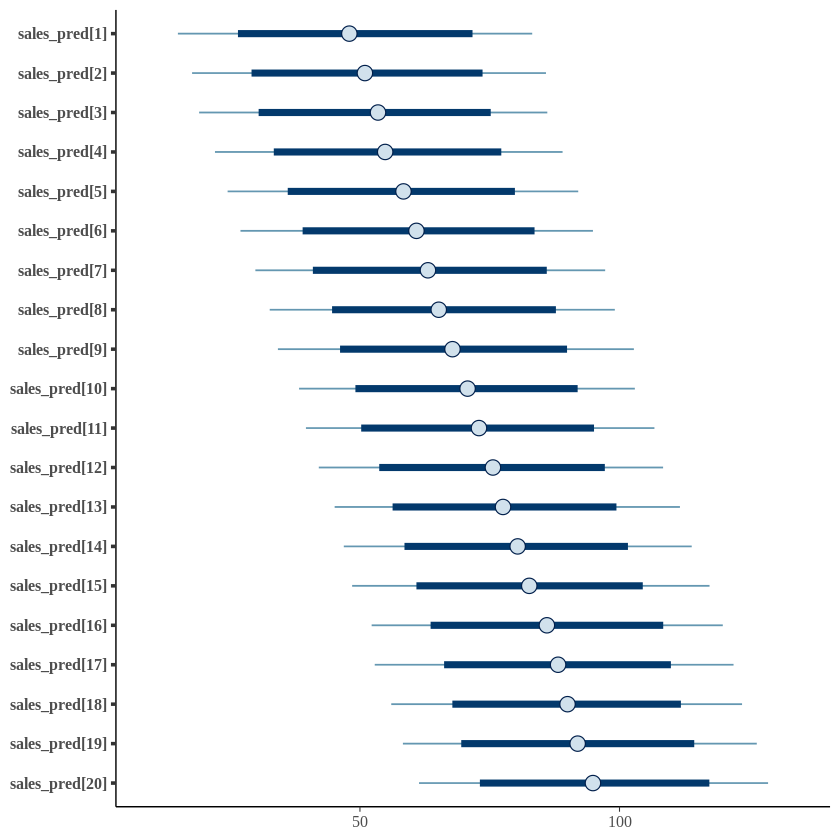

In [11]:
mcmc_sample_pred <- rstan::extract(mcmc_result_pred, permuted = FALSE)

mcmc_intervals(
    mcmc_sample_pred,
    regex_pars = c("sales_pred."),
    prob = 0.8,
    prob_outer = 0.95
)

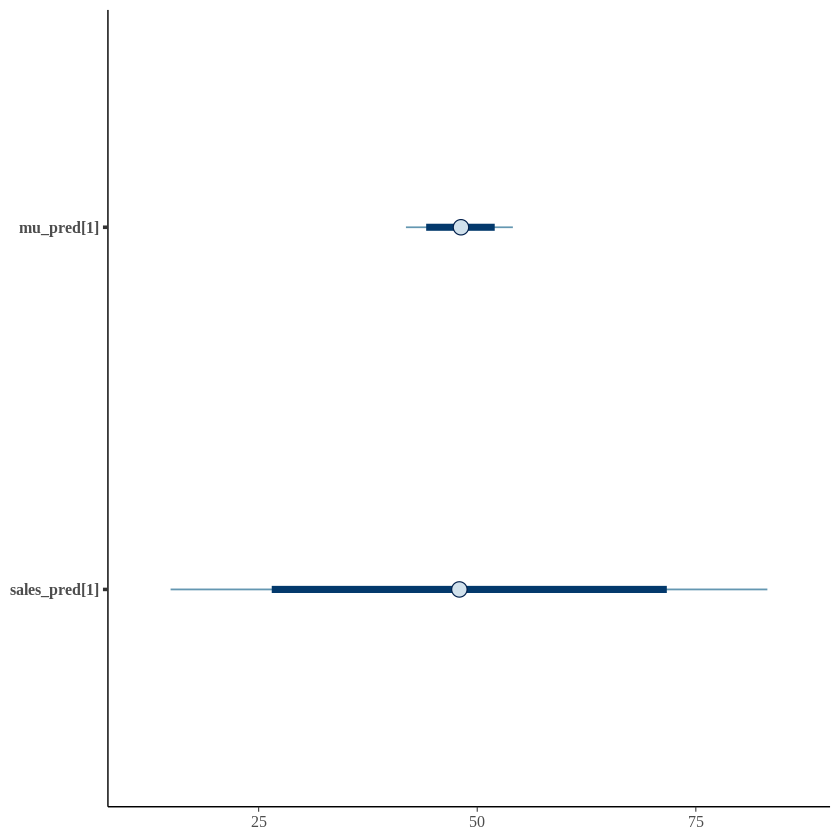

In [12]:
mcmc_intervals(
    mcmc_sample_pred,
    pars = c("mu_pred[1]", "sales_pred[1]"),
    prob = 0.8,
    prob_outer = 0.95
)

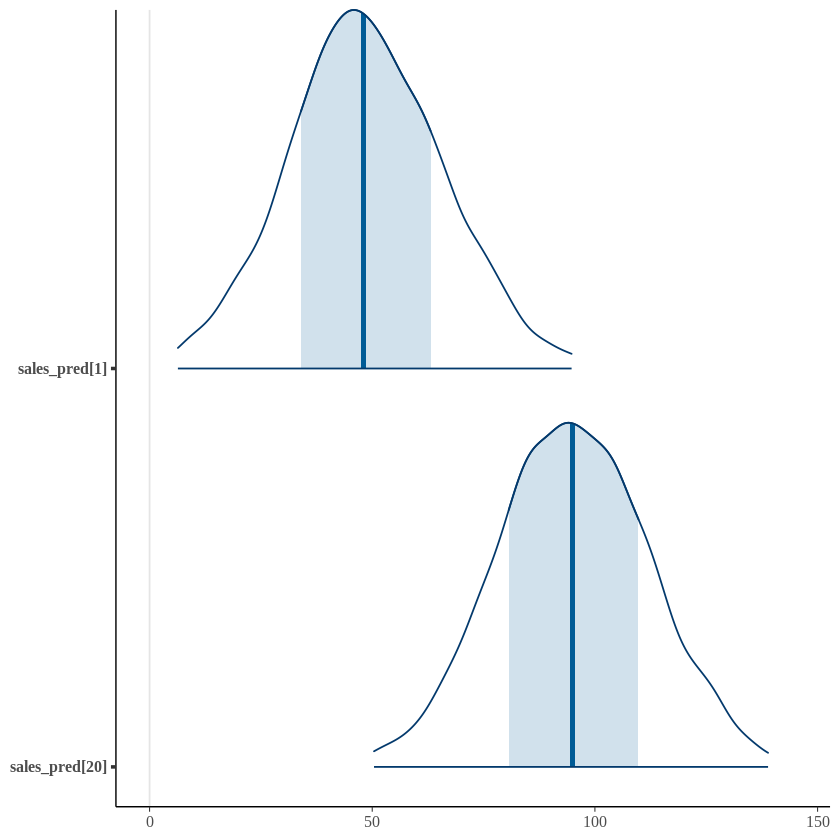

In [13]:
mcmc_areas(
    mcmc_sample_pred,
    pars = c("sales_pred[1]", "sales_pred[20]"),
    prob = 0.6,
    prob_outer = 0.99
)

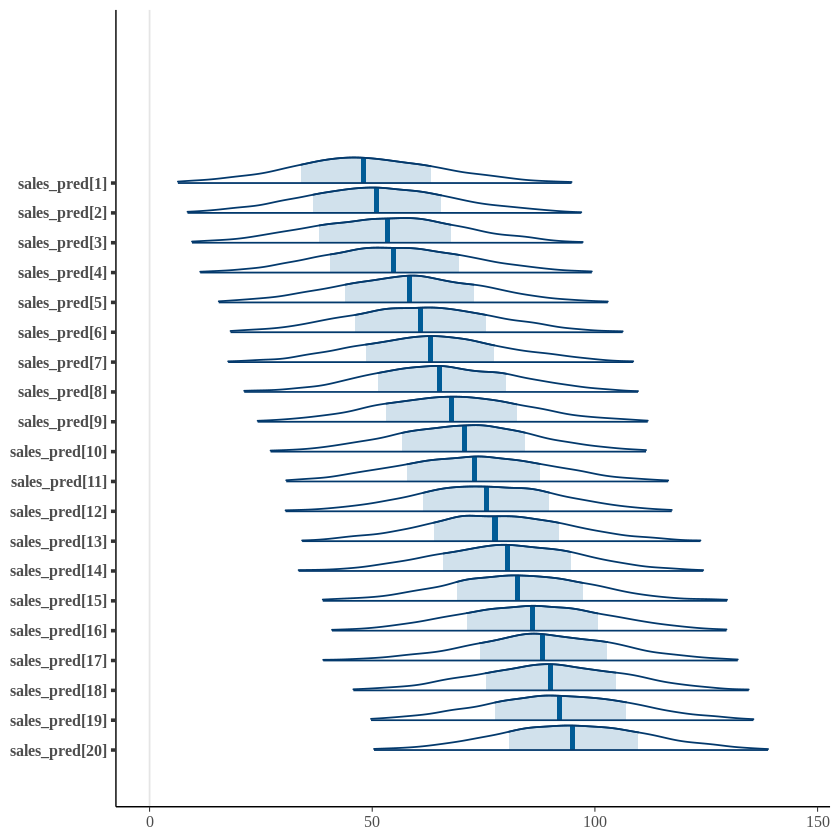

In [14]:
mcmc_areas(
    mcmc_sample_pred,
    regex_pars = c("sales_pred"),
    prob = 0.6,
    prob_outer = 0.99
)